In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, LassoLars
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [9]:
train = pd.read_csv("train_V2.csv")
train.columns = ['Id','groupId','matchId','assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','matchType','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints','winPlacePerc']



In [10]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
train['healsandboosts'] = train['heals'] + train['boosts']
train['totaldistance'] = train['rideDistance'] + train['swimDistance'] + train['walkDistance']
train.describe()




,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,healsandboosts,totaldistance
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06,4.446966e+06,4.446966e+06,4.446966e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01,9.419479e+01,2.477055e+00,1.764843e+03
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01,6.686538e+00,3.879985e+00,2.183117e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01,9.300000e+01,0.000000e+00,1.581000e+02
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01,9.500000e+01,1.000000e+00,7.882000e+02
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01,9.700000e+01,4.000000e+00,2.728447e+03
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00,1.000000e+02,8.100000e+01,4.127010e+04


In [11]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)
train['killPlace'] = train['killPlace']*((100 - train['playersJoined'])/100 + 1)


In [12]:
train['killswithoutmoving'] = ((train['totaldistance']==0) & (train['kills'] > 0))


In [13]:
print(train[train['killswithoutmoving'] == True].shape)
train.drop(train[train['killswithoutmoving'] == True].index, inplace=True)
print(train[train['kills'] > 40].shape)
print(train[(train['headshotKills']/train['kills'] == 1) & (train['kills'] > 12)].shape)

print(train[(train['totaldistance'] == train['swimDistance'])&(train['winPlacePerc'] > 0.80)].shape)
train.drop(train[(train['totaldistance'] == train['swimDistance'])&(train['winPlacePerc'] > 0.80)].index, inplace=True)
train.drop(train[train['kills'] > 40].index, inplace=True)
train.drop(train[(train['headshotKills']/train['kills'] == 1) & (train['kills'] > 12)].index, inplace=True)

(1535, 37)
(32, 37)
(6, 37)
(991, 37)


In [14]:
print(train[train['weaponsAcquired'] > 50].shape)
train.drop(train[train['weaponsAcquired'] > 50].index, inplace=True)
print(train[train['heals'] > 35].shape)
train.drop(train[train['heals'] > 35].index, inplace=True)



(133, 37)
(273, 37)


In [15]:
# ONLY  FOR THE ENTIRE DATASET ###################
train[train['winPlacePerc'].isnull()]
train.drop(2744604, inplace=True)

In [16]:
print(train[(train['weaponsAcquired'] > 35) & (train['totaldistance'] == 0)].shape)
train.drop(train[(train['weaponsAcquired'] > 35) & (train['totaldistance'] == 0)].index, inplace=True)

(1, 37)


In [17]:
print(train[(train['weaponsAcquired'] > 30) & (train['totaldistance'] < 50) & (train.kills > 30)].shape)
train.drop(train[(train['weaponsAcquired'] > 30) & (train['totaldistance'] < 50) & (train.kills > 30)].index, inplace=True)

(2, 37)


In [18]:
train[train.longestKill > 950].shape
train.drop(train[train['longestKill'] > 950].index, inplace=True)

In [19]:
#columns = ['killsNorm', 'damageDealtNorm', 'matchDurationNorm', 'assists', 'healsandboosts', 'DBNOs', 'killPlace', 'walkDistance', 'winPoints'
#          ,'weaponsAcquired', 'killStreaks']
columns = ['killsNorm', 'damageDealtNorm', 'matchDurationNorm','healsandboosts', 'DBNOs', 'killPlace','walkDistance', 'winPoints'
          ,'weaponsAcquired', 'killStreaks', 'longestKill', 'teamKills', 'maxPlace', 'assists', 'revives'
          ,'numGroups']

In [8]:
X = train[columns]
y = train['winPlacePerc']

train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(model.score(val_X, val_y))

NameError: name 'df' is not defined

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=1)
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, min_samples_leaf=3, max_features='sqrt')
regressor.fit(train_X, train_y)
predict = regressor.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(regressor.score(val_X, val_y))

0.0808319208667455
0.9308010497031849


In [35]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = train_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                   importance
walkDistance         0.369007
killPlace            0.292914
healsandboosts       0.130154
weaponsAcquired      0.066043
longestKill          0.034372
killsNorm            0.022867
damageDealtNorm      0.021986
matchDurationNorm    0.016594
killStreaks          0.012893
numGroups            0.011162
maxPlace             0.009005
winPoints            0.003540
DBNOs                0.003441
revives              0.002981
assists              0.002859
teamKills            0.000184


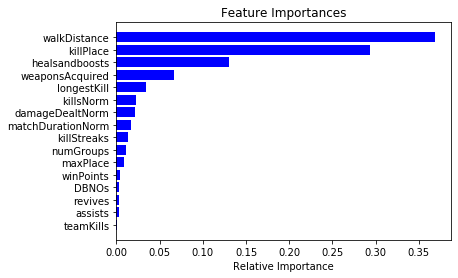

In [41]:
features = train_X.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
rr = Ridge(alpha=0.01)
rr.fit(train_X, train_y)
predict = rr.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(rr.score(val_X, val_y))


0.12652996538570369
0.8304411406793917


In [21]:
rr100 = Ridge(alpha=100)
rr100.fit(train_X, train_y)
predict = rr100.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(rr100.score(val_X, val_y))



0.12652996523626547
0.8304411410799065


In [23]:
lasso = Lasso()
lasso.fit(train_X,train_y)
predict = lasso.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, predict)))
print(lasso.score(val_X, val_y))


0.15693635013352306
0.7391560285911426


In [27]:
polynomial_features= PolynomialFeatures(degree=2)
val_X_poly = polynomial_features.fit_transform(val_X)

In [29]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_X)

model = LinearRegression()
model.fit(x_poly, train_y)
pred = model.predict(val_X_poly)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(model.score(val_X_poly, val_y))

0.09804710977610648
0.8981869846368673


In [31]:
regr = ElasticNet(random_state=0)
regr.fit(train_X, train_y)
pred = regr.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(regr.score(val_X, val_y))


0.15056344057732113
0.7599107203307014


In [33]:
regr = LassoLars()
regr.fit(train_X, train_y)
pred = regr.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(regr.score(val_X, val_y))

0.30727933640617217
-9.678422276948595e-07


In [ ]:
X = train[columns]
y = train['winPlacePerc']
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=1)


xgboost = xgb.XGBRegressor(learning_rate=0.01, max_depth=8, n_estimators=5000)
xgboost.fit(train_X, train_y)
pred = xgboost.predict(val_X)
print(np.sqrt(metrics.mean_squared_error(val_y, pred)))
print(xgboost.score(val_X, val_y))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:13:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
